In [ ]:
#imports

In [30]:
!pip install kaggle


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import math
import plotly.express as px
import plotly.graph_objects as go

from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)
from plotly.colors import n_colors
from plotly.subplots import make_subplots
from IPython.display import Image
from colorama import Fore, Back, Style
y_ = Fore.YELLOW
r_ = Fore.RED
g_ = Fore.GREEN
b_ = Fore.BLUE
m_ = Fore.MAGENTA
sr_ = Style.RESET_ALL

In [ ]:
#custom color palette

In [7]:
custom_colors = ["#ff6b6b","#95d5b2","#a2d2ff","#72efdd"]
customPalette = sns.set_palette(sns.color_palette(custom_colors))

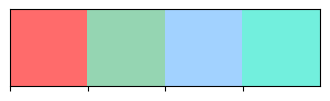

In [9]:
sns.palplot(sns.color_palette(custom_colors),size=1)

In [11]:
#netflix

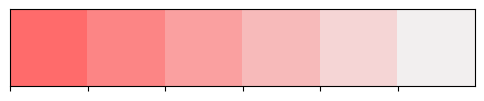

In [13]:
netflix_p = sns.light_palette(custom_colors[0], reverse=True)
sns.palplot(sns.color_palette(netflix_p),size=1)

In [15]:
#hulu

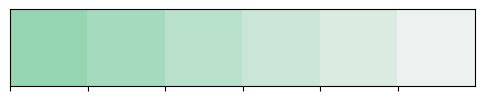

In [17]:
hulu_p = sns.light_palette(custom_colors[1], reverse=True)
sns.palplot(sns.color_palette(hulu_p),size=1)

In [19]:
#prime video

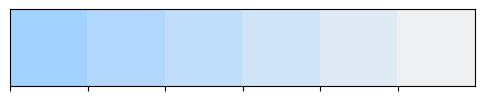

In [21]:
prime_p = sns.light_palette(custom_colors[2], reverse=True)
sns.palplot(sns.color_palette(prime_p),size=1)


In [23]:
#disney+hotstar

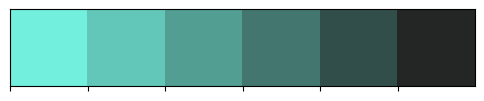

In [25]:
disney_p = sns.dark_palette(custom_colors[3], reverse=True)
sns.palplot(sns.color_palette(disney_p),size=1)


In [80]:
df_tv = pd.read_csv("C:\\Users\\user\\Downloads\\combined_tvshows.csv")
df_movies = pd.read_csv("C:\\Users\\user\\Downloads\\combined_movies.csv")

In [ ]:
#Loading the dataset and displaying rows

In [84]:

df_tv.head(5)

show_id     type                  title         director  \
0      s2  TV Show          Blood & Water              NaN   
1      s3  TV Show              Ganglands  Julien Leclercq   
2      s4  TV Show  Jailbirds New Orleans              NaN   
3      s5  TV Show           Kota Factory              NaN   
4      s6  TV Show          Midnight Mass    Mike Flanagan   

                                                cast       country  \
0  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...  South Africa   
1  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...           NaN   
2                                                NaN           NaN   
3  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...         India   
4  Kate Siegel, Zach Gilford, Hamish Linklater, H...           NaN   

           date_added  release_year   duration  \
0  September 24, 2021          2021  2 Seasons   
1  September 24, 2021          2021   1 Season   
2  September 24, 2021          2021   1 Season   
3  September 24, 2021          2021  2 Seasons   
4  September 24, 2021          2021   1 Season   

                                           listed_in  \
0    International TV Shows, TV Dramas, TV Mysteries   
1  Crime TV Shows, International TV Shows, TV Act...   
2                             Docuseries, Reality TV   
3  International TV Shows, Romantic TV Shows, TV ...   
4                 TV Dramas, TV Horror, TV Mysteries   

                                         description  netflix  hulu  disney+  \
0  After crossing paths at a party, a Cape Town t...        1     0        0   
1  To protect his family from a powerful drug lor...        1     0        0   
2  Feuds, flirtations and toilet talk go down amo...        1     0        0   
3  In a city of coaching centers known to train I...        1     0        0   
4  The arrival of a charismatic young priest brin...        1     0        0   

   prime  imdb  rotten_tomatoes  
0      0   9.7               49  
1      0   8.4               32  
2      0   8.5               35  
3      0   4.1               59  
4      0   6.8               30

In [86]:

df_movies.head(5)

show_id   type                             title  \
0      s1  Movie              Dick Johnson Is Dead   
1      s7  Movie  My Little Pony: A New Generation   
2      s8  Movie                           Sankofa   
3     s10  Movie                      The Starling   
4     s13  Movie                      Je Suis Karl   

                        director  \
0                Kirsten Johnson   
1  Robert Cullen, José Luis Ucha   
2                   Haile Gerima   
3                 Theodore Melfi   
4            Christian Schwochow   

                                                cast  \
0                                                NaN   
1  Vanessa Hudgens, Kimiko Glenn, James Marsden, ...   
2  Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...   
3  Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...   
4  Luna Wedler, Jannis Niewöhner, Milan Peschel, ...   

                                             country          date_added  \
0                                      United States  September 25, 2021   
1                                                NaN  September 24, 2021   
2  United States, Ghana, Burkina Faso, United Kin...  September 24, 2021   
3                                      United States  September 24, 2021   
4                            Germany, Czech Republic  September 23, 2021   

   release_year duration                                         listed_in  \
0          2020   90 min                                     Documentaries   
1          2021   91 min                          Children & Family Movies   
2          1993  125 min  Dramas, Independent Movies, International Movies   
3          2021  104 min                                  Comedies, Dramas   
4          2021  127 min                      Dramas, International Movies   

                                         description  netflix  hulu  disney+  \
0  As her father nears the end of his life, filmm...        1     0        0   
1  Equestria's divided. But a bright-eyed hero be...        1     0        0   
2  On a photo shoot in Ghana, an American model s...        1     0        0   
3  A woman adjusting to life after a loss contend...        1     0        0   
4  After most of her family is murdered in a terr...        1     0        0   

   prime  imdb  rotten_tomatoes  
0      0   9.7               47  
1      0   4.5               50  
2      0   5.8               49  
3      0   7.8               97  
4      0   4.6               51

In [44]:
#Number of unique directors for movies

In [88]:
len(df_movies['director'].unique())

9950

In [50]:
#Number of release year for movies

In [90]:
len(df_movies['release_year'].unique())

101

In [54]:
#Feature generation

In [56]:
def splitting(dataframe,col):
    result = dataframe[col].str.get_dummies(',')
    print('Done!')
    return result

In [92]:
m_type = splitting(df_movies,'type')
m_listed = splitting(df_movies,'listed_in')

Done!
Done!


In [68]:
#TV shows and Movies per platform

In [94]:
def val_sum(df,c):
    return df[c].sum(axis=0)

In [96]:
val_counts = []
dfs = [df_movies,df_tv]
cols = ['netflix','hulu','prime','disney+']

for x in dfs:
    for y in cols:
        val_counts.append(val_sum(x,y))

In [98]:
val_counts

[6131, 1484, 7814, 1052, 2676, 1589, 1854, 398]

In [100]:
def donut(i,df,sizes,title):
    plt.subplot(i)
    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
                autopct='%1.1f%%', shadow=True)

    centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=1.25)
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.title(title)
    plt.axis('equal')

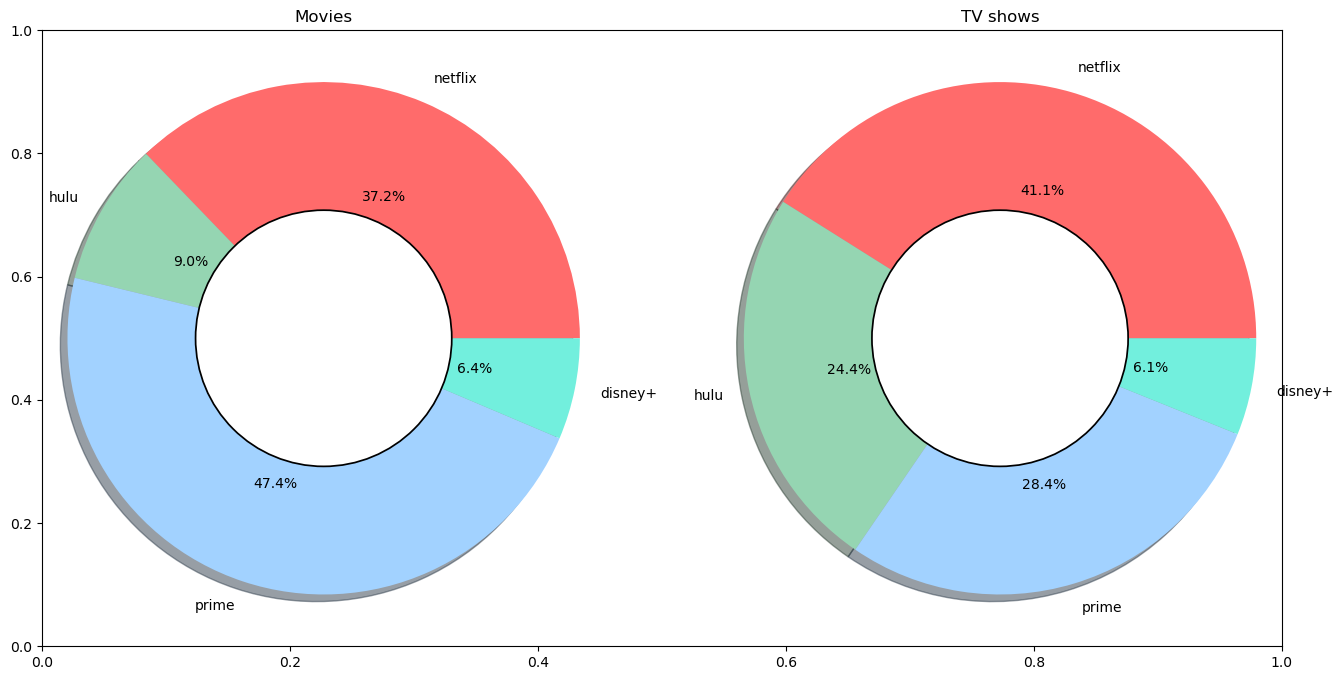

In [102]:
fig = plt.subplots(figsize=(16, 8))
labels = 'netflix', 'hulu','prime','disney+'
sizes1 = [val_counts[0], val_counts[1],val_counts[2],val_counts[3]]
sizes2 = [val_counts[4], val_counts[5],val_counts[6],val_counts[7]]
colors = custom_colors
explode = (0, 0, 0, 0) 

donut(121,df_movies,sizes1,'Movies')
donut(122,df_tv,sizes2,'TV shows')
plt.show()

In [106]:
#📌 Prime has the maximum number of movies and Netflix has the maximum number of tv shows!

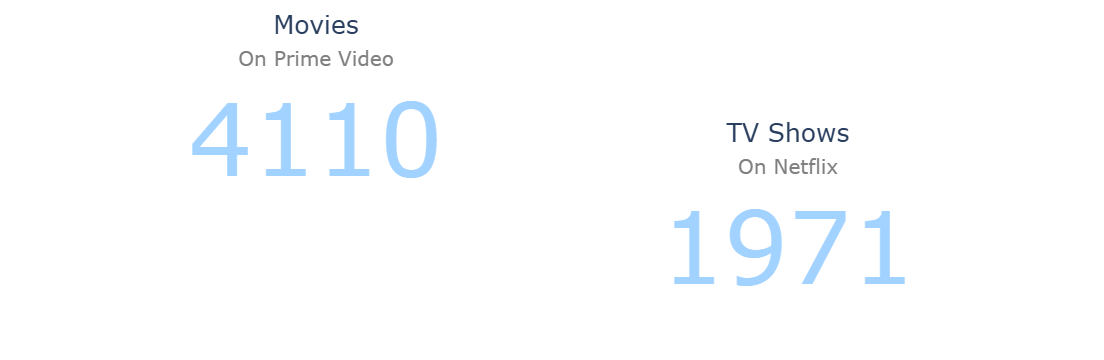

In [108]:
fig = make_subplots(rows=1, cols=2)

fig.add_trace(go.Indicator(
    mode = "number",
    value = 4113,
    number={'font':{'color': custom_colors[2],'size':100}},
    title = {"text": "Movies<br><span style='font-size:0.8em;color:gray'>On Prime Video</span>"},
    domain = {'x': [0, 0.5], 'y': [0.6, 1]}))

fig.add_trace(go.Indicator(
    mode = "number",
    value = 1971,
    number={'font':{'color': custom_colors[2],'size':100}},
    title = {"text": "TV Shows<br><span style='font-size:0.8em;color:gray'>On Netflix</span>"},
    domain = {'x': [0.5, 1], 'y': [0, 0.4]}))

fig.show()

In [110]:
#Movies with the highest IMDb rating on each platform and genres

In [118]:
df_movies['imdb'] = df_movies['imdb'].astype(float)
df_movies['rotten_tomatoes'] = df_movies['rotten_tomatoes'].astype(float)
df_tv['imdb'] = df_movies['imdb'].astype(float)
df_tv['rotten_tomatoes'] = df_movies['rotten_tomatoes'].astype(float)

In [154]:
def sunburst(dataframe,platform,c):
    dataframe=dataframe.loc[dataframe[platform] == 1]
    dataframe=dataframe.sort_values(by='imdb', ascending=False)
    rating = dataframe[0:10]
    fig =px.sunburst(
    rating,
    path=['title','director'],
    values='imdb',
    color='imdb',
    color_continuous_scale=c)
    fig.show()

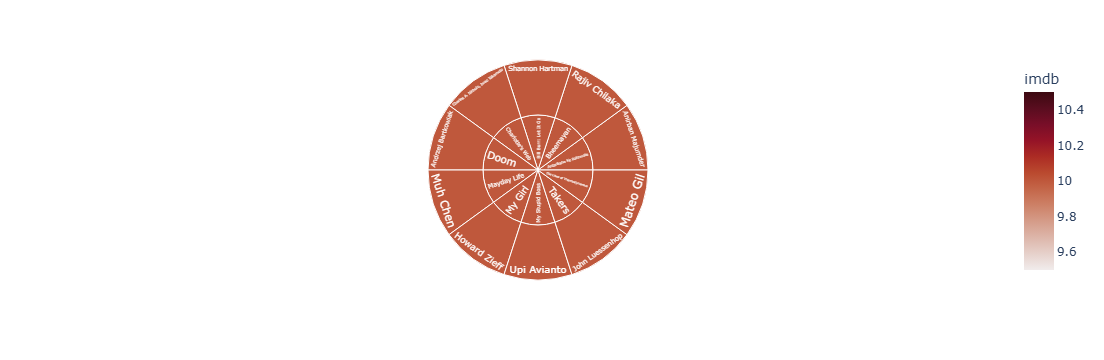

In [150]:
sunburst(df_movies,'netflix','amp')

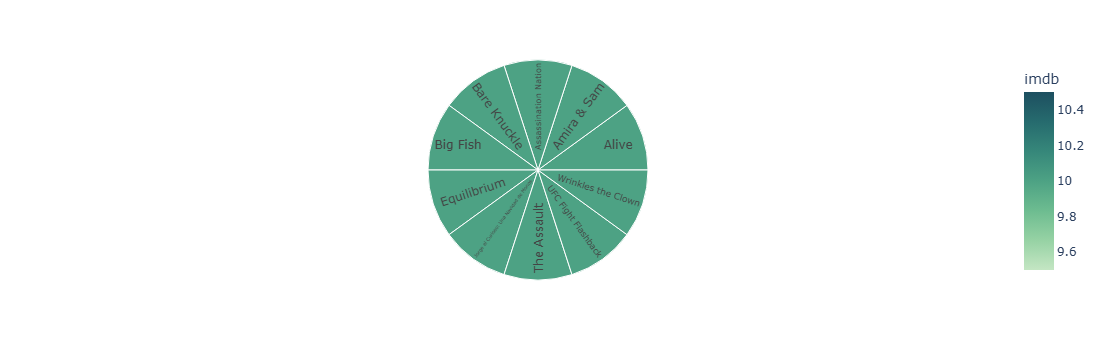

In [156]:
sunburst(df_movies,'hulu','Blugrn')

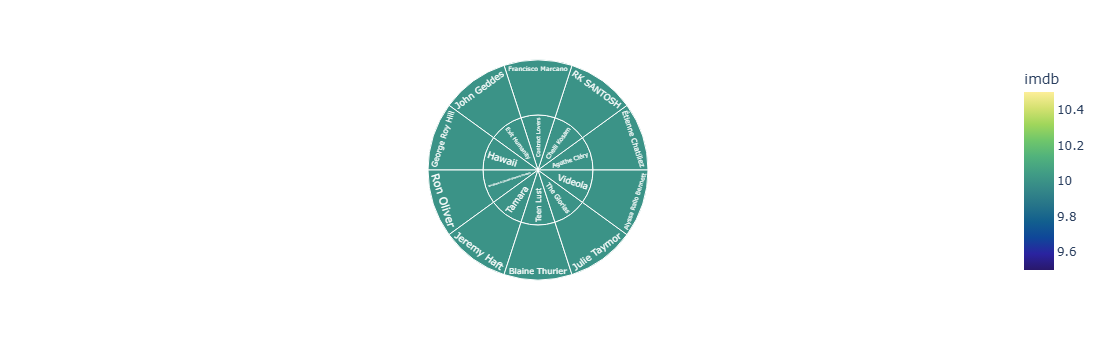

In [160]:
sunburst(df_movies,'prime','haline')

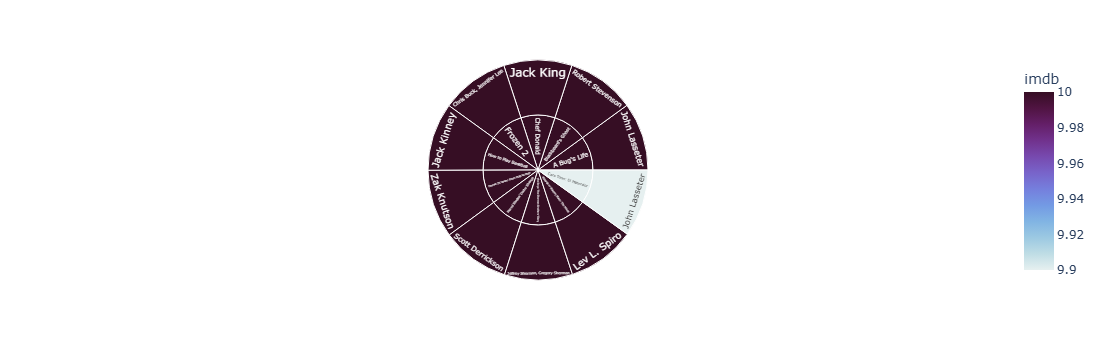

In [164]:
sunburst(df_movies,'disney+','dense')

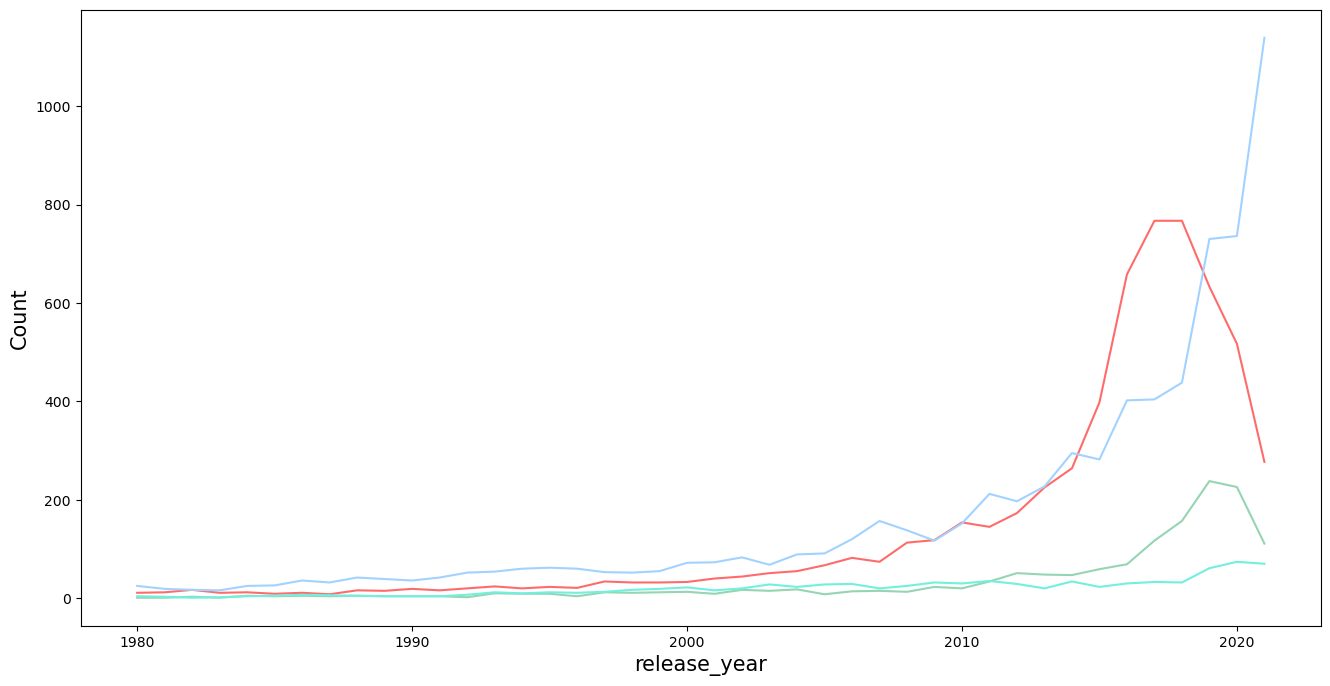

In [182]:
post_1980 = df_movies[df_movies.release_year >= 1980]
year_movies = post_1980.groupby('release_year')[['netflix','hulu','prime','disney+']].sum()

plt.figure(figsize = (16, 8))
sns.lineplot(x=year_movies.index,y=year_movies['netflix'])
sns.lineplot(x=year_movies.index,y=year_movies['hulu'])
sns.lineplot(x=year_movies.index,y=year_movies['prime'])
sns.lineplot(x=year_movies.index,y=year_movies['disney+'])
plt.xlabel('release_year', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

In [184]:
#TV shows with the highest IMDb rating vs availability

In [186]:
r = df_tv.sort_values(by='imdb', ascending=False)
r = r[0:20]
r = r[['title','imdb','netflix','hulu','prime','disney+']]
r['imdb'] = r['imdb'].astype(float)

In [188]:
r.style.bar(subset=["netflix"], color='#ff6b6b')\
.bar(subset=["hulu"], color='#95d5b2')\
.bar(subset=["prime"], color='#a2d2ff')\
.bar(subset=["disney+"], color='#72efdd')\
.bar(subset=["imdb"], color='#').background_gradient(cmap='Purples')

In [190]:
#Movies with the highest IMDb rating, genres and languages

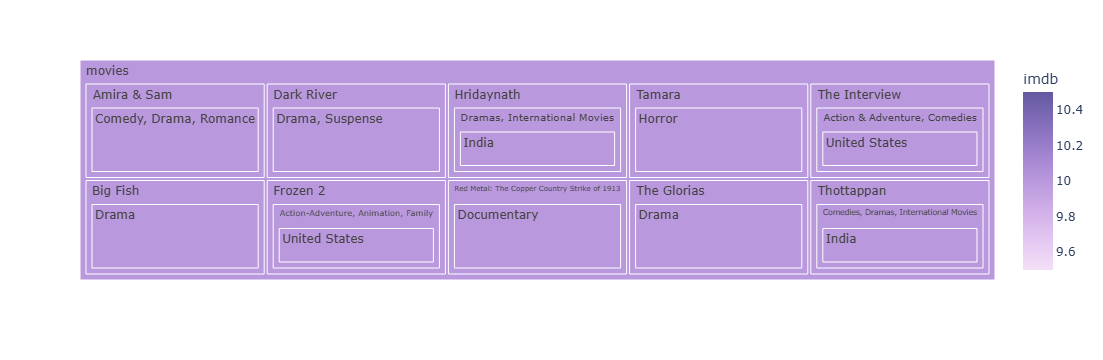

In [202]:
r1 = df_movies.sort_values(by='imdb', ascending=False)
r1 = r1[0:10]
r1['movies']='movies'
fig = px.treemap(r1, path=['movies','title', 'listed_in', 'country',], values='imdb',color='imdb',color_continuous_scale='Purp')
fig.show()

In [204]:
#Movies with the highest Rotten Tomatoes rating vs directors

In [212]:
df_m = df_movies.copy()
df_m = df_m.dropna()

# Convert rotten_tomatoes safely
df_m['rotten_tomatoes'] = (
    df_m['rotten_tomatoes']
    .astype(str)                # Ensure it's a string
    .str.replace('%', '')       # Remove % symbol
    .astype(float)              # Convert to float (e.g., '40.0')
    .astype(int)                # Convert to int (e.g., 40)
)

# Optional: convert director to string
df_m['director'] = df_m['director'].astype(str)


C:\Users\user\AppData\Local\Temp\ipykernel_1584\1011365608.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\user\AppData\Local\Temp\ipykernel_1584\1011365608.py:3: UserWarning:


The palette list has fewer values (6) than needed (20) and will cycle, which may produce an uninterpretable plot.



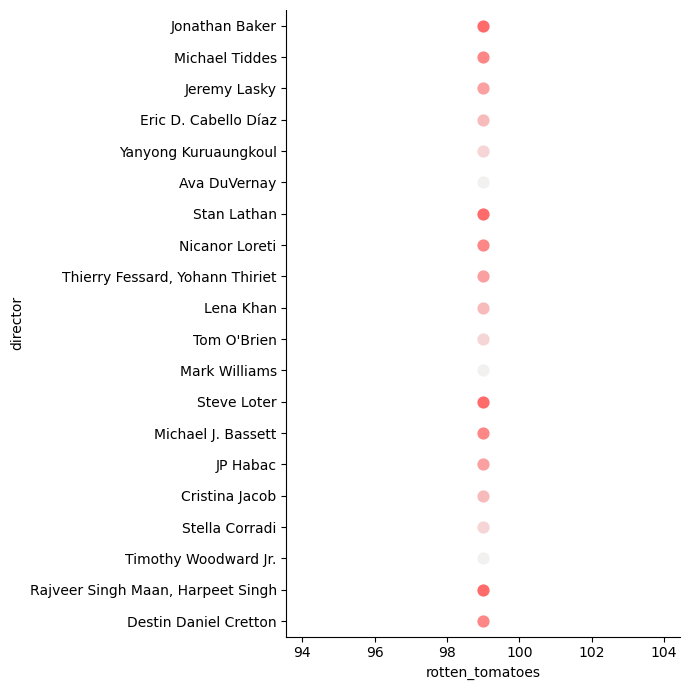

In [220]:
df_m=df_m.sort_values(by='rotten_tomatoes', ascending=False)
rating = df_m[0:20]
sns.catplot(x="rotten_tomatoes", y="director",data=rating, palette=netflix_p,height=7,kind="point");

In [222]:
#Distribution of IMDb and Rotten Tomatoes ratings of movies on all platforms

In [224]:
def dist(i,dataframe,platform,c):
    plt.subplot(i)
    dataframe=dataframe.loc[dataframe[platform] == 1]
    sns.distplot(dataframe['imdb'], color=custom_colors[c],vertical=True)
    
    plt.ylabel('imdb rating, '+platform, fontsize = 15)
    plt.subplot(i+1)
    sns.distplot(dataframe['rotten_tomatoes'], color=custom_colors[c],vertical=True)
    plt.ylabel('rotten_tomatoes, '+platform, fontsize = 15)

C:\Users\user\AppData\Local\Temp\ipykernel_1584\3090115109.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\user\AppData\Local\Temp\ipykernel_1584\3090115109.py:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\user\AppData\Local\Temp\ipykernel_1584\3090115109.py:4: UserWarning:



`distplot` is a dep

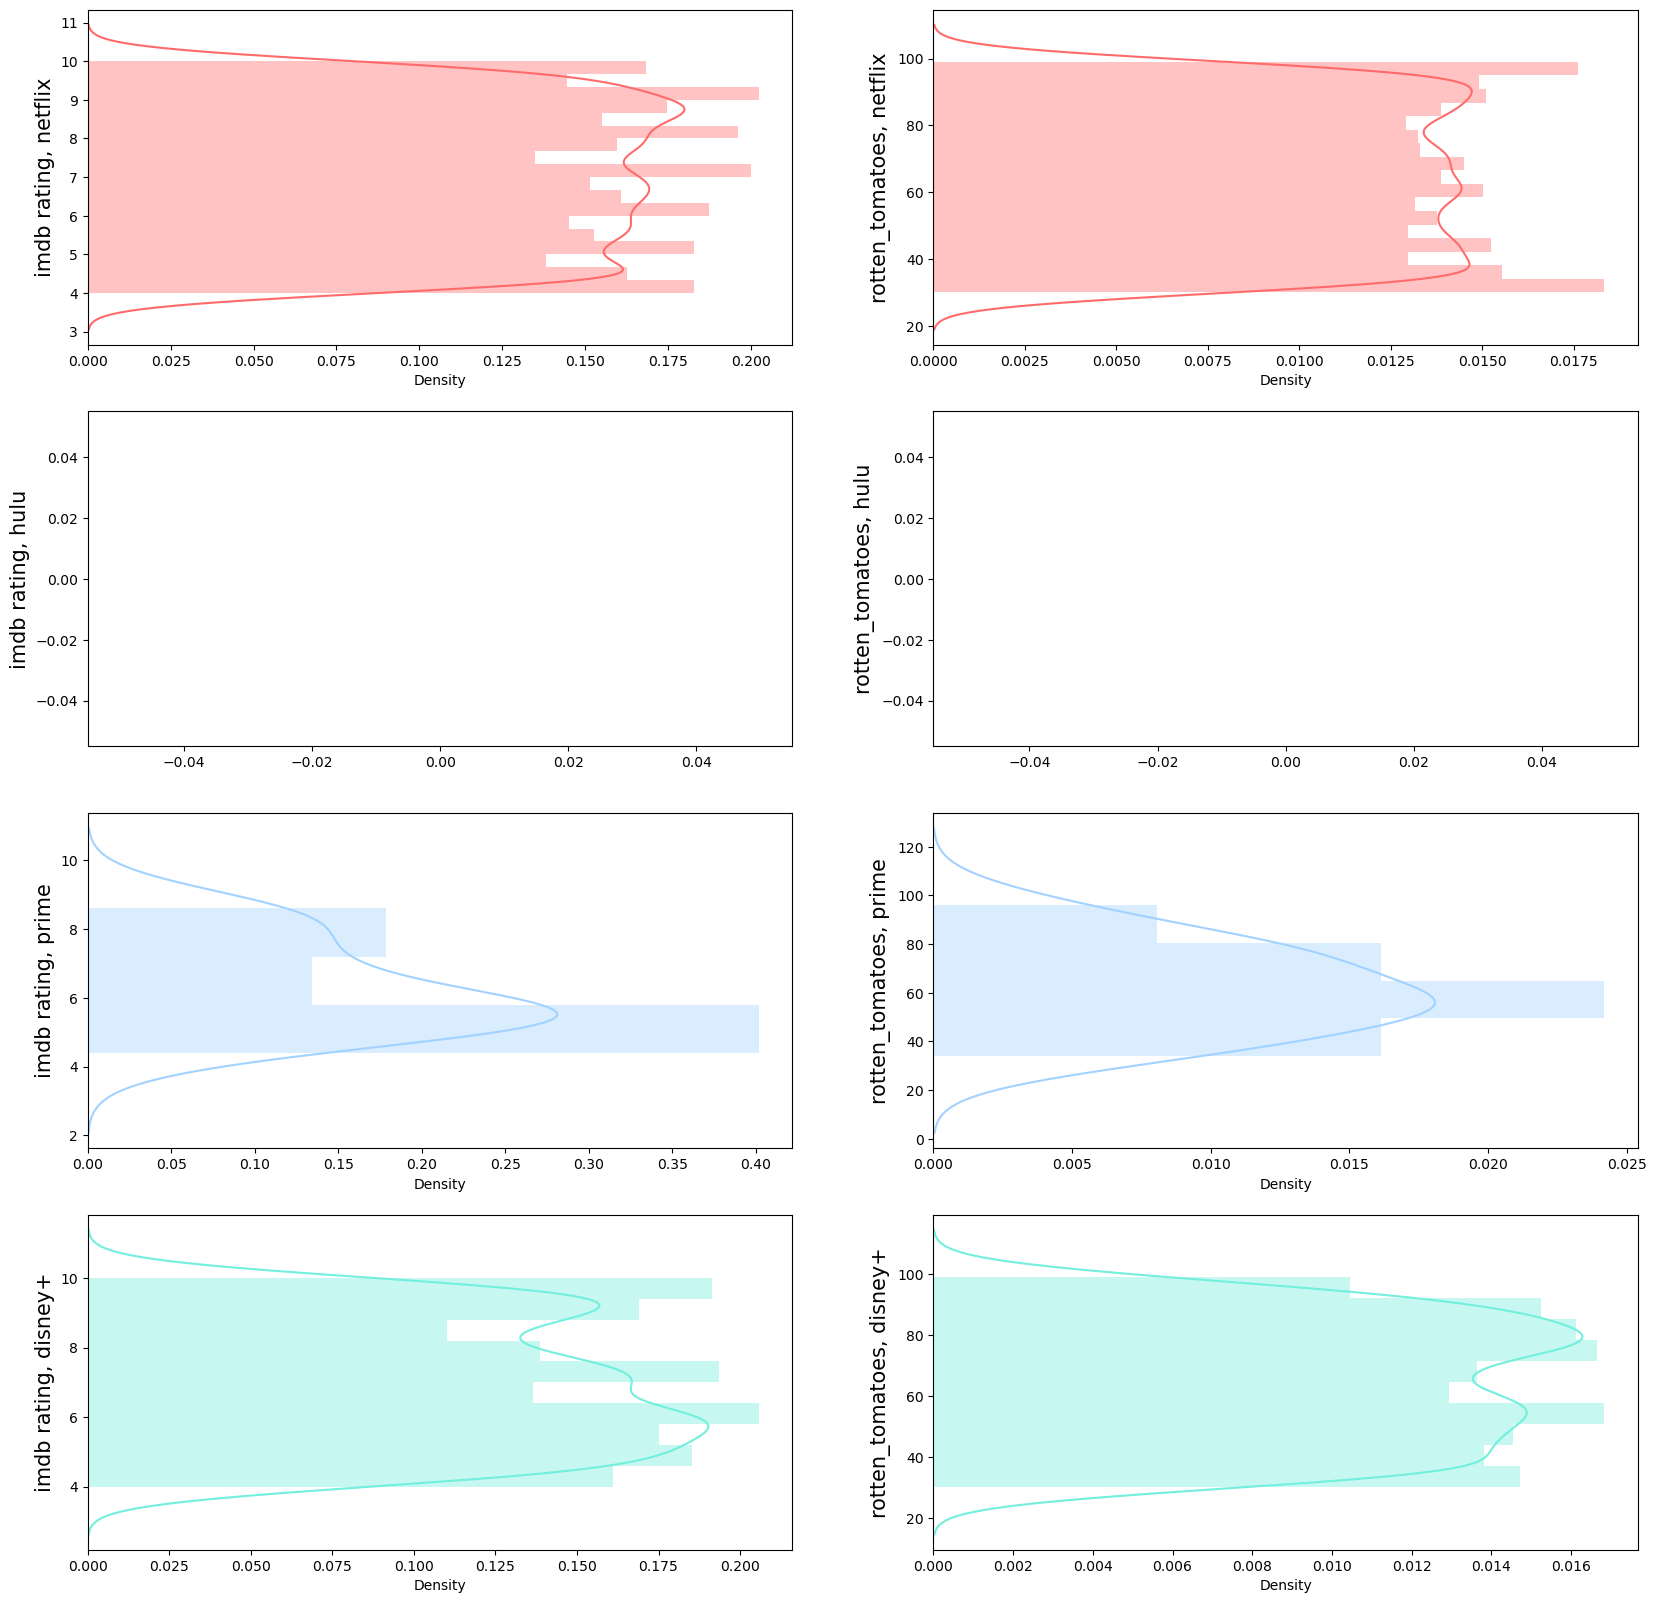

In [226]:
plt.figure(figsize = (20, 20))

dist(421,df_m,'netflix',0)
dist(423,df_m,'hulu',1)
dist(425,df_m,'prime',2)
dist(427,df_m,'disney+',3)

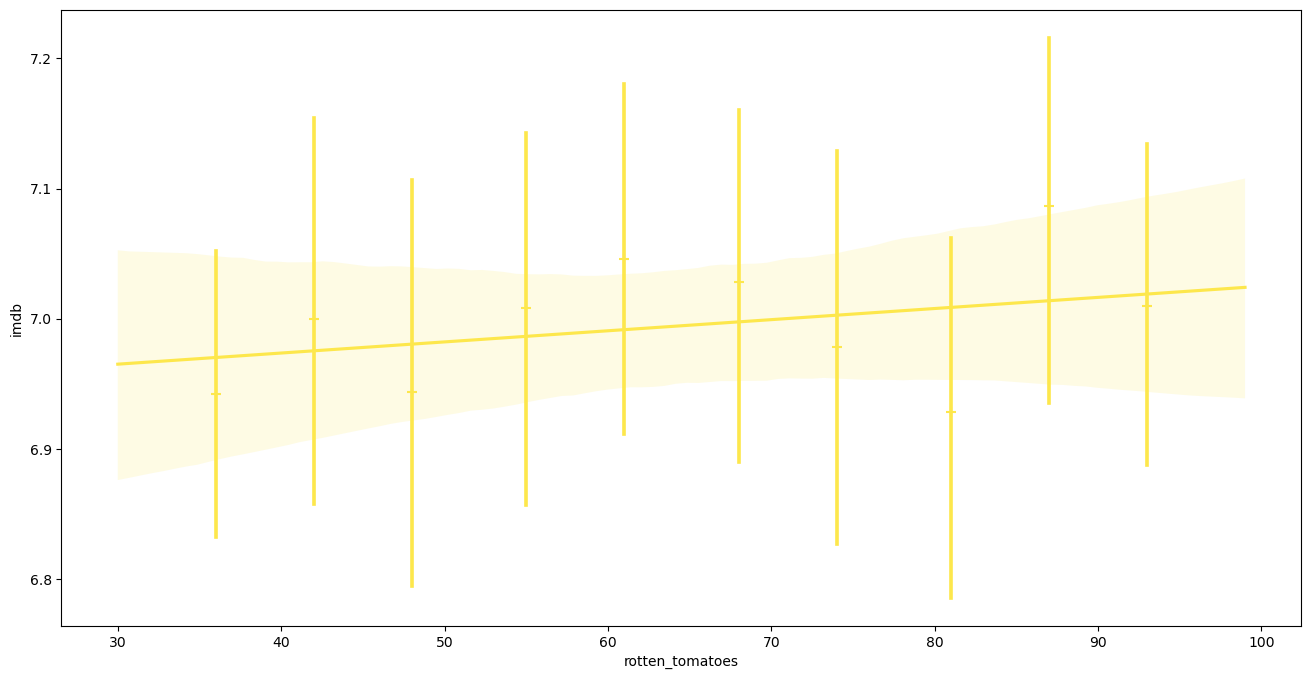

In [228]:
df_m['rotten_tomatoes'] = df_m['rotten_tomatoes'].astype(float)
df_m['imdb'] = df_m['imdb'].astype(float)

plt.figure(figsize = (16, 8))
sns.regplot(x = df_m['rotten_tomatoes'],y = df_m['imdb'],x_bins=10,marker="+",color="#FDE74C")
plt.show()

In [240]:
df_l_merged = pd.concat([df_movies, m_lang], axis = 1, sort = False)
df_g_merged = pd.concat([df_movies, m_genres], axis = 1, sort = False)

In [242]:
def bar(dataframe,platform,c):
    dataframe=dataframe.loc[dataframe[platform] == 1]
    val_counts = dataframe.iloc[:,15:].sum(axis=0).sort_values(ascending=False)
    val_counts2 = pd.DataFrame(val_counts,columns=['Number of movies']
    return val_counts2[0:20].style.bar(subset=["Number of movies",], color=c)

In [252]:
from IPython.display import Image

Image(url='https://upload.wikimedia.org/wikipedia/commons/f/fd/Netflix-Logo.png')

In [244]:
bar(df_l_merged,'netflix','#ff6b6b')

In [248]:
bar(df_g_merged,'netflix','#ff6b6b')

In [260]:
from IPython.display import Image

Image(url='https://download.logo.wine/logo/Hulu/Hulu-Logo.wine.png')

In [264]:
bar(df_l_merged,'hulu','#95d5b2')

In [266]:
bar(df_g_merged,'hulu','#95d5b2')

In [272]:
from IPython.display import Image

Image(url='https://upload.wikimedia.org/wikipedia/commons/7/7c/Amazon_Prime_Video_blue_logo_1.svg')

In [276]:
bar(df_l_merged,'prime','#a2d2ff')

In [278]:
bar(df_g_merged,'prime','#a2d2ff')

In [284]:
from IPython.display import Image

Image(url='https://upload.wikimedia.org/wikipedia/commons/3/3e/Disney%2B_logo.svg')

In [288]:
bar(df_l_merged,'disney+','#72efdd')

In [292]:
bar(df_g_merged,'disney+','#72efdd')